# Customer Segmentation Analysis Project

## Import Required Libraries

In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load the Dataset


In [2]:
file_path = 'ifood_df.csv'
data = pd.read_csv(file_path)

In [3]:
# Preview the dataset
print(data.head())
print(data.info())  # Check for missing values and data types


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

## Data Exploration and Cleaning

### Check for missing or inconsistent data


In [5]:
# Check for missing values
print(data.isnull().sum())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

## Data Preprocessing

### Standardize the data to ensure features are on the same scale


In [29]:
# Select relevant features
features = data[['MntTotal', 'Customer_Days']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Customer Segmentation with K-Means

### Determine the optimal number of clusters using the Elbow Method

In [20]:
# Use inertia to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


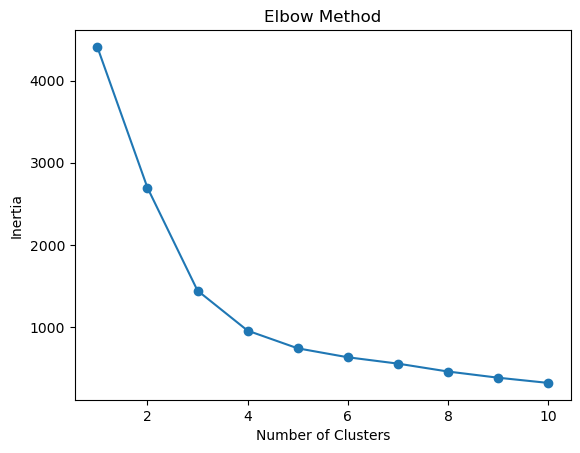

In [21]:
# Plot the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### Apply K-Means clustering

In [22]:
# Assuming the optimal number of clusters is 4 (from the elbow graph)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

# View data with segment labels
print(data.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0         

## Visualization of Results

### Scatter plot of clusters:

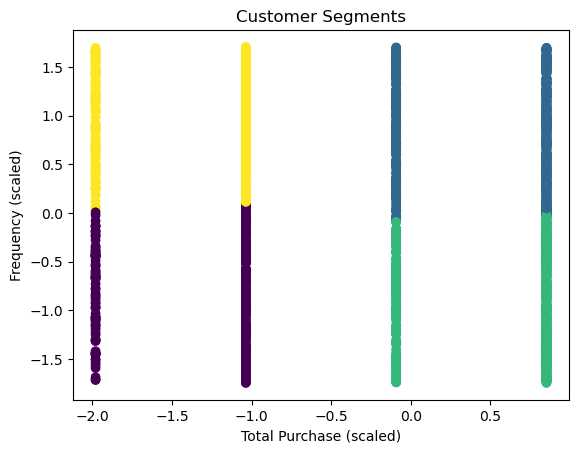

In [23]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Segment'], cmap='viridis')
plt.xlabel('Total Purchase (scaled)')
plt.ylabel('Frequency (scaled)')
plt.title('Customer Segments')
plt.show()

### Bar plot for segment characteristics

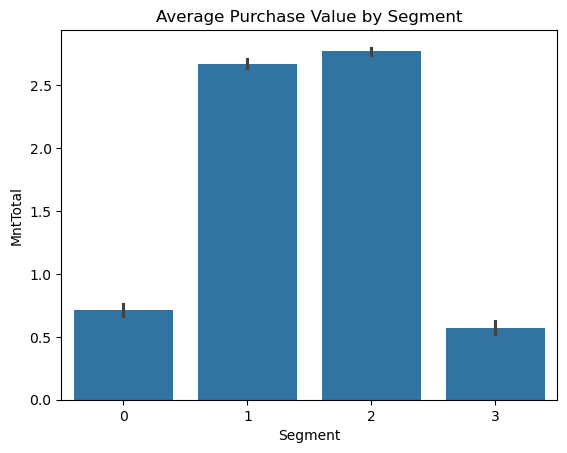

In [37]:
# Average purchase value by segment
sns.barplot(x='Segment', y='MntTotal', data=data)
plt.title('Average Purchase Value by Segment')
plt.show()



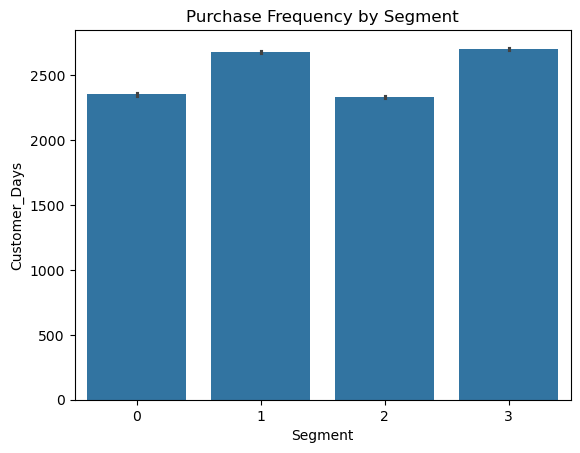

In [38]:
# Frequency by segment
sns.barplot(x='Segment', y='Customer_Days', data=data)
plt.title('Purchase Frequency by Segment')
plt.show()

### Summary of each segment

In [26]:
segment_summary = data.groupby('Segment').mean()
print(segment_summary)


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Segment                                                                       
0        68018.221154  0.160256  0.580128  46.865385  501.346154  42.477564   
1        45286.652687  0.520315  0.500655  49.834862  243.836173  21.267366   
2        45530.198718  0.584615  0.474359  48.406410  162.175641  16.434615   
3        64393.608571  0.205714  0.525714  50.462857  588.940000  45.485714   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0             275.227564        57.676282         43.737179     57.641026   
1             119.030144        31.148100         23.064220     43.960682   
2              95.873077        23.960256         16.556410     27.605128   
3             322.974286        65.151429         44.742857     68.822857   

         ...  marital_Together  marital_Widow  education_2n Cy

## Insights and Recommendations:

Segment 0: High spenders with frequent purchases → Offer loyalty rewards or VIP perks.

Segment 1: Low spenders with infrequent purchases → Target with discounts and promotions.

Segment 2: Moderate spenders with occasional purchases → Upsell complementary products.

Segment 3: High spenders with low frequency → Encourage frequent purchases through personalized campaigns.
